In [1]:
import pandas as pd
import numpy as np
import regex
import os

book_path = "/data/ephemeral/home/data/features/v2/books/book_features.parquet"
books = pd.read_parquet(book_path)




In [2]:
books["book_title"].head()

0                                         Clara Callan
1                                 Decision in Normandy
2    Flu: The Story of the Great Influenza Pandemic...
3                               The Kitchen God's Wife
4    What If?: The World's Foremost Military Histor...
Name: book_title, dtype: object

In [3]:
num_unique_titles = books["book_title"].nunique()
print("Unique book titles:", num_unique_titles)


Unique book titles: 135436


In [5]:
books["title_len"] = books["book_title"].astype(str).str.len()

books["title_len"].describe()


count    149570.000000
mean         37.530534
std          25.296017
min           1.000000
25%          18.000000
50%          32.000000
75%          51.000000
max         256.000000
Name: title_len, dtype: float64

In [6]:
dup_groups = (
    books
    .groupby(["book_title", "book_author"])
    .filter(lambda x: x["isbn"].nunique() > 1)
)


In [9]:
isbn_counts = (
    dup_groups
    .groupby(["book_title", "book_author"])["isbn"]
    .nunique()
    .reset_index()
    .rename(columns={"isbn": "isbn_count"})
    .sort_values("isbn_count", ascending=False)
)
len(isbn_counts)


7994

In [10]:
cols = ["book_title", "book_author", "isbn", "publisher", "year_of_publication"]
dup_detail = dup_groups[cols].sort_values(["book_title", "book_author"])
dup_detail.head(30)


,book_title,book_author,isbn,publisher,year_of_publication
14923,'Salem's Lot,Stephen King,067103975X,Pocket,2000.0
15243,'Salem's Lot,Stephen King,0451168089,Signet Book,1990.0
52626,'Salem's Lot,Stephen King,0385007515,Doubleday Books,1993.0
43736,10 Lb. Penalty,Dick Francis,0399143025,Putnam Pub Group,1997.0
46781,10 Lb. Penalty,Dick Francis,0515123471,Jove Books,1998.0
105120,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,1566196256,Barnes & Nobles Books,1995.0
117852,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,1566196264,Barnes & Nobles Books,1995.0
15167,100 Ways to Motivate Yourself,Steve Chandler,1564145190,Career Press,2001.0
41017,100 Ways to Motivate Yourself,Steve Chandler,1564142493,Career Pr,1996.0
85944,101 Famous Poems,Roy J. Cook,0809288346,McGraw-Hill/Contemporary Books,1994.0


In [11]:
num_dup_books = isbn_counts.shape[0]
num_dup_books


7994

In [12]:
isbn_counts.head(10)


,book_title,book_author,isbn_count
283,Adventures of Huckleberry Finn,Mark Twain,15
4453,Pride and Prejudice,Jane Austen,14
6896,The Secret Garden,Frances Hodgson Burnett,14
7928,Wuthering Heights,Emily Bronte,13
1705,Dracula,Bram Stoker,12
3385,Little Women,Louisa May Alcott,12
3037,Jane Eyre,Charlotte Bronte,12
3605,Matilda,Roald Dahl,10
2516,Hannibal,Thomas Harris,9
1020,Carrie,Stephen King,9


📌 제목+저자 동일하지만 ISBN이 다른 책 총 개수: 18059
📌 중복 책 그룹 수: 7994


,num_isbn,num_publishers
count,7994.000000,7994.000000
mean,2.259069,1.960595
std,0.768489,0.772396
min,2.000000,1.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,15.000000,13.000000


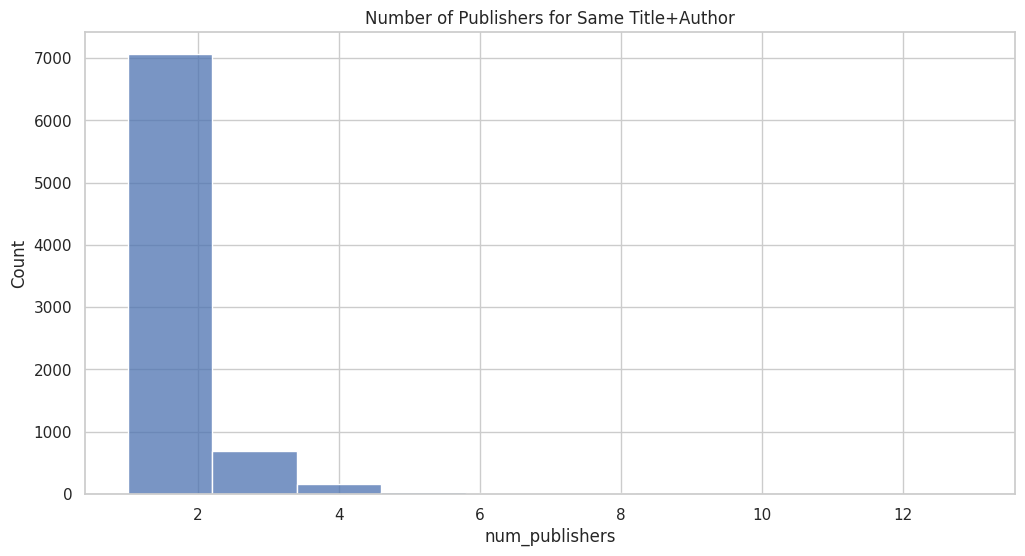

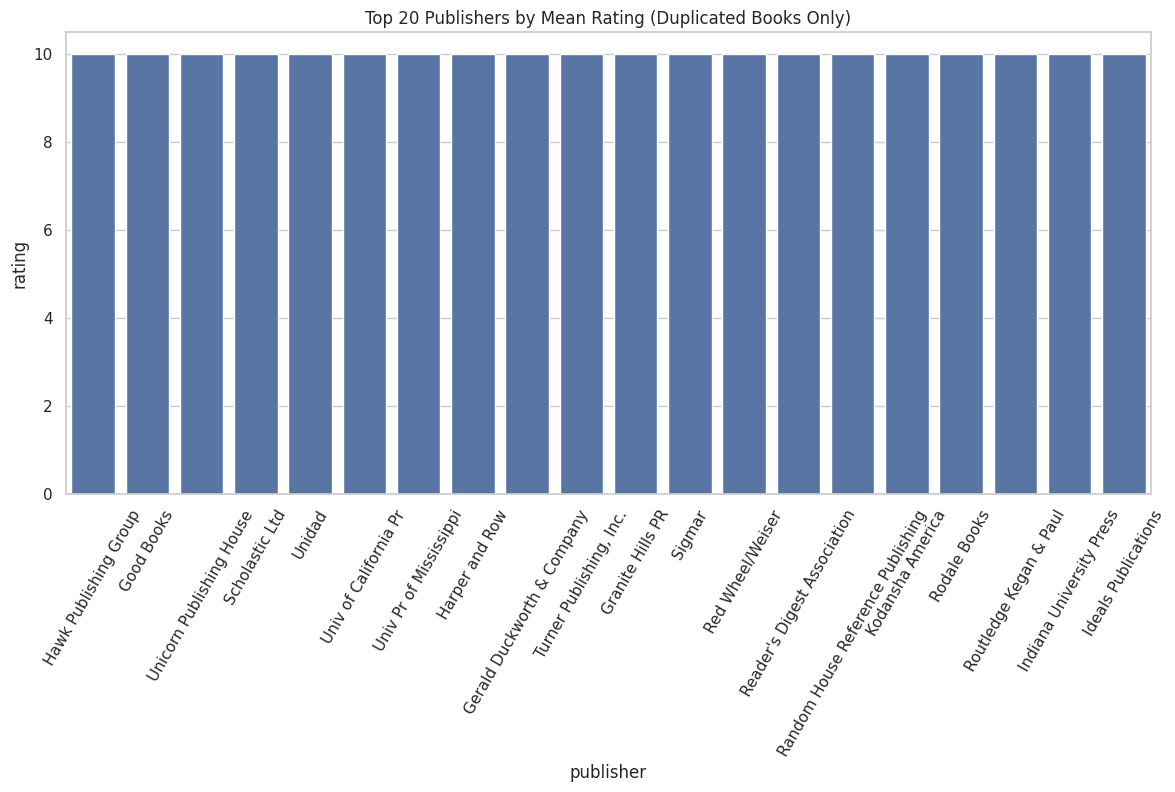

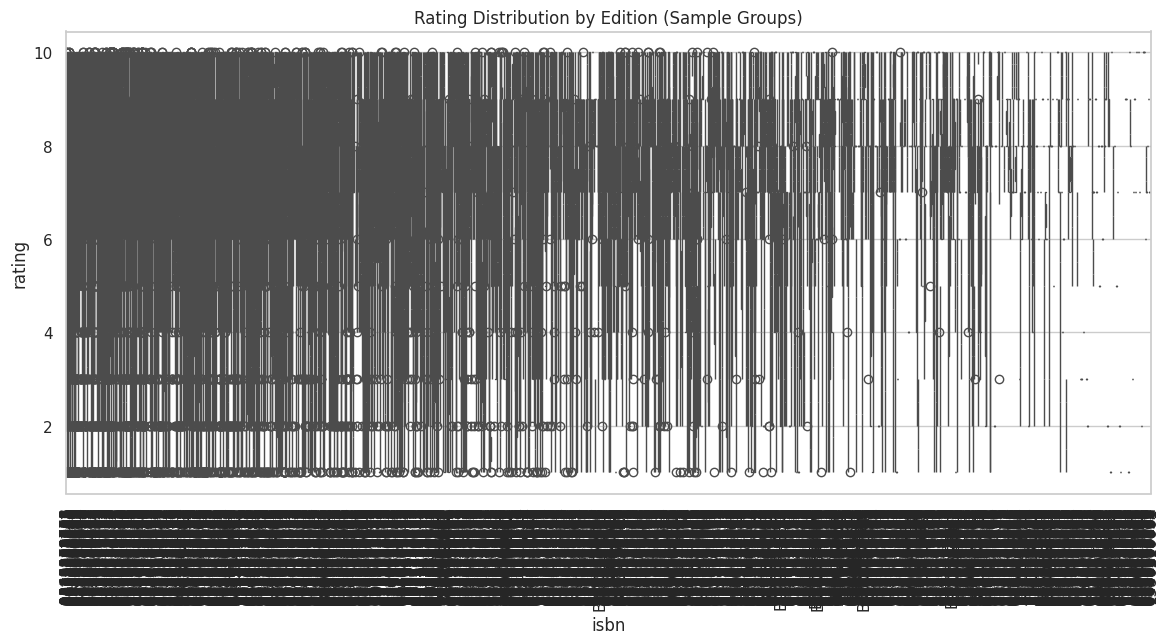

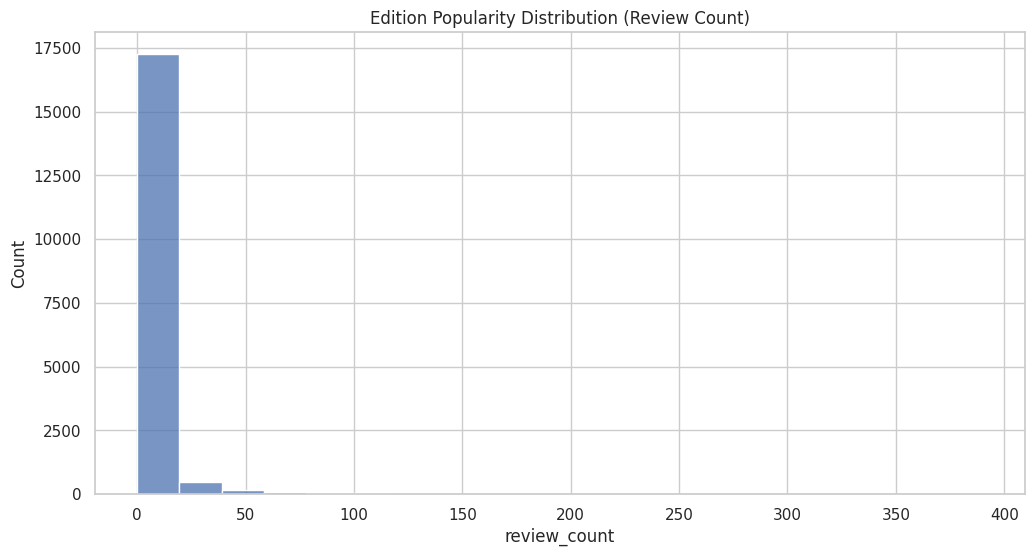

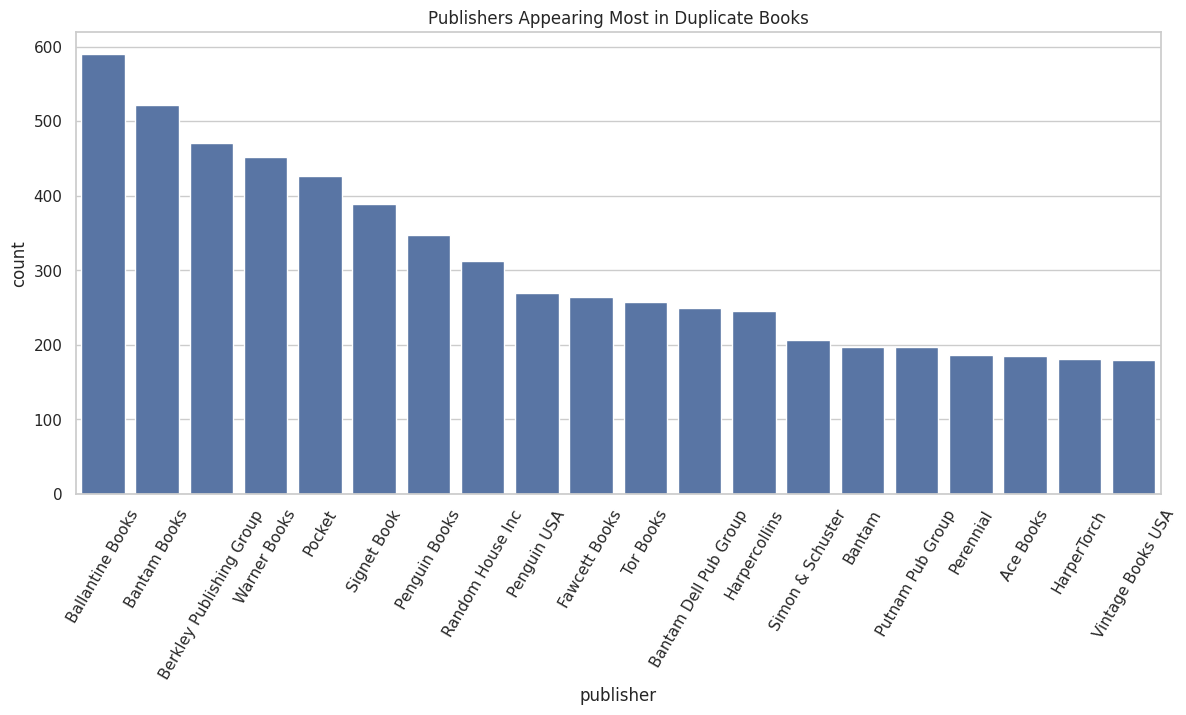

📌 중복 책 예시 (제목·저자 동일, 출판사만 다른 경우):


,book_title,book_author,isbn,publisher,year_of_publication
14923,'Salem's Lot,Stephen King,067103975X,Pocket,2000.0
15243,'Salem's Lot,Stephen King,0451168089,Signet Book,1990.0
52626,'Salem's Lot,Stephen King,0385007515,Doubleday Books,1993.0
43736,10 Lb. Penalty,Dick Francis,0399143025,Putnam Pub Group,1997.0
46781,10 Lb. Penalty,Dick Francis,0515123471,Jove Books,1998.0
105120,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,1566196256,Barnes & Nobles Books,1995.0
117852,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,1566196264,Barnes & Nobles Books,1995.0
15167,100 Ways to Motivate Yourself,Steve Chandler,1564145190,Career Press,2001.0
41017,100 Ways to Motivate Yourself,Steve Chandler,1564142493,Career Pr,1996.0
85944,101 Famous Poems,Roy J. Cook,0809288346,McGraw-Hill/Contemporary Books,1994.0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------
# 0) 기본 settings
# -------------------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# -------------------------------------
# 1) 제목+저자 동일하지만 ISBN이 여러 개인 책 추출
# -------------------------------------
dup_books = (
    books
    .groupby(["book_title", "book_author"])
    .filter(lambda x: x["isbn"].nunique() > 1)
)

print("📌 제목+저자 동일하지만 ISBN이 다른 책 총 개수:", dup_books.shape[0])

# 그룹 개수
group_count = (
    dup_books.groupby(["book_title", "book_author"])["isbn"]
    .nunique()
    .reset_index()
    .rename(columns={"isbn": "num_isbn"})
)
print("📌 중복 책 그룹 수:", group_count.shape[0])

# -------------------------------------
# 2) ISBN 수 / 출판사 수 분석
# -------------------------------------
edition_stats = (
    dup_books.groupby(["book_title", "book_author"])
    .agg(
        num_isbn=("isbn", "nunique"),
        num_publishers=("publisher", "nunique")
    )
    .reset_index()
)

display(edition_stats.describe())

# 히스토그램
sns.histplot(edition_stats["num_publishers"], bins=10, kde=False)
plt.title("Number of Publishers for Same Title+Author")
plt.show()

# -------------------------------------
# 3) 출판사별 평균 rating 비교
# (train_df = user_id, isbn, rating 포함한 rating 데이터셋)
# -------------------------------------
train_rating_df = pd.read_csv("/data/ephemeral/home/data/train_ratings.csv")

dup_with_rating = dup_books.merge(train_rating_df, on="isbn", how="left")

publisher_rating = (
    dup_with_rating.groupby("publisher")["rating"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=publisher_rating.head(20),
    x="publisher",
    y="rating"
)
plt.xticks(rotation=60)
plt.title("Top 20 Publishers by Mean Rating (Duplicated Books Only)")
plt.show()

# -------------------------------------
# 4) 같은 제목·저자 내 edition 별 rating 분포
# -------------------------------------
sample_group = (
    dup_with_rating
    .groupby(["book_title", "book_author"])
    .filter(lambda x: x["isbn"].nunique() >= 3)
    .groupby(["book_title", "book_author"])
    .head(200)
)

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=sample_group,
    x="isbn",
    y="rating"
)
plt.xticks(rotation=90)
plt.title("Rating Distribution by Edition (Sample Groups)")
plt.show()

# -------------------------------------
# 5) edition popularity (리뷰 수)
# -------------------------------------
edition_pop = (
    dup_with_rating.groupby("isbn")["rating"]
    .count()
    .reset_index()
    .rename(columns={"rating": "review_count"})
    .sort_values("review_count", ascending=False)
)

sns.histplot(edition_pop["review_count"], bins=20)
plt.title("Edition Popularity Distribution (Review Count)")
plt.show()

# -------------------------------------
# 6) 중복 책을 가장 많이 가진 출판사 Top 20
# -------------------------------------
publisher_dup_count = (
    dup_books.groupby("publisher")
    .size()
    .sort_values(ascending=False)
    .reset_index(name="count")
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=publisher_dup_count.head(20),
    x="publisher",
    y="count"
)
plt.xticks(rotation=60)
plt.title("Publishers Appearing Most in Duplicate Books")
plt.show()

# -------------------------------------
# 7) 중복 책 샘플 몇 개 보여주기
# -------------------------------------
sample = (
    dup_books
    .sort_values(["book_title", "book_author"])
    [["book_title", "book_author", "isbn", "publisher", "year_of_publication"]]
    .head(20)
)

print("📌 중복 책 예시 (제목·저자 동일, 출판사만 다른 경우):")
display(sample)


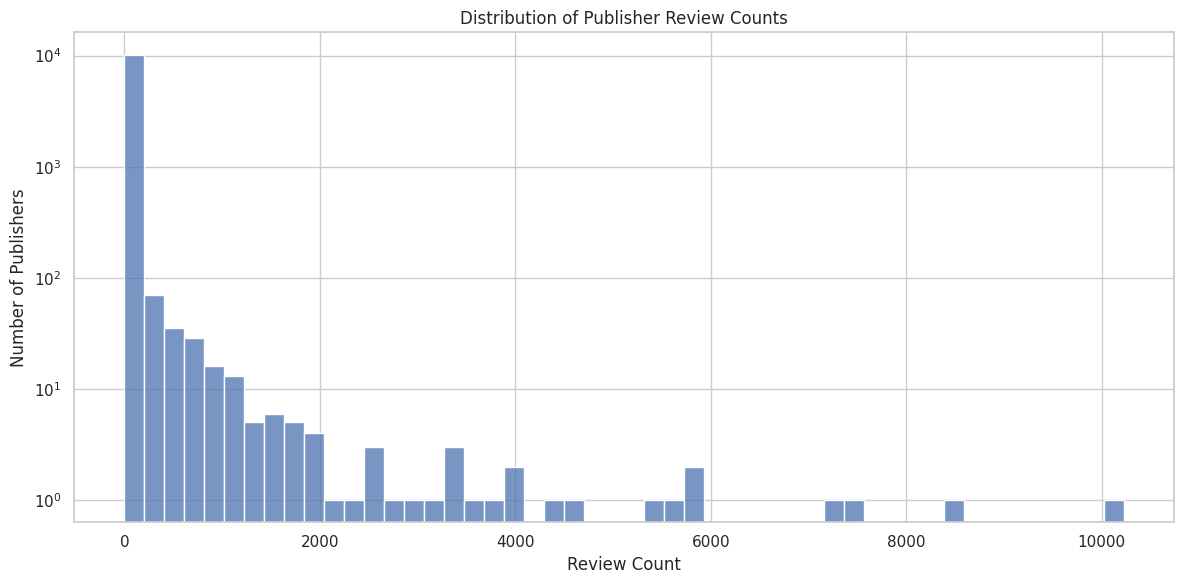

📌 Top 150 Publishers by Review Count


,publisher,review_count,mean_rating
887,Ballantine Books,10227,7.057397
7255,Pocket,8414,6.982529
1103,Berkley Publishing Group,7441,6.871523
9886,Warner Books,7199,6.970274
902,Bantam,5906,7.298849
905,Bantam Books,5828,6.956246
7025,Penguin Books,5612,7.276194
8459,Signet Book,5432,7.040869
7083,Perennial,4598,7.316224
799,Avon,4436,7.091524


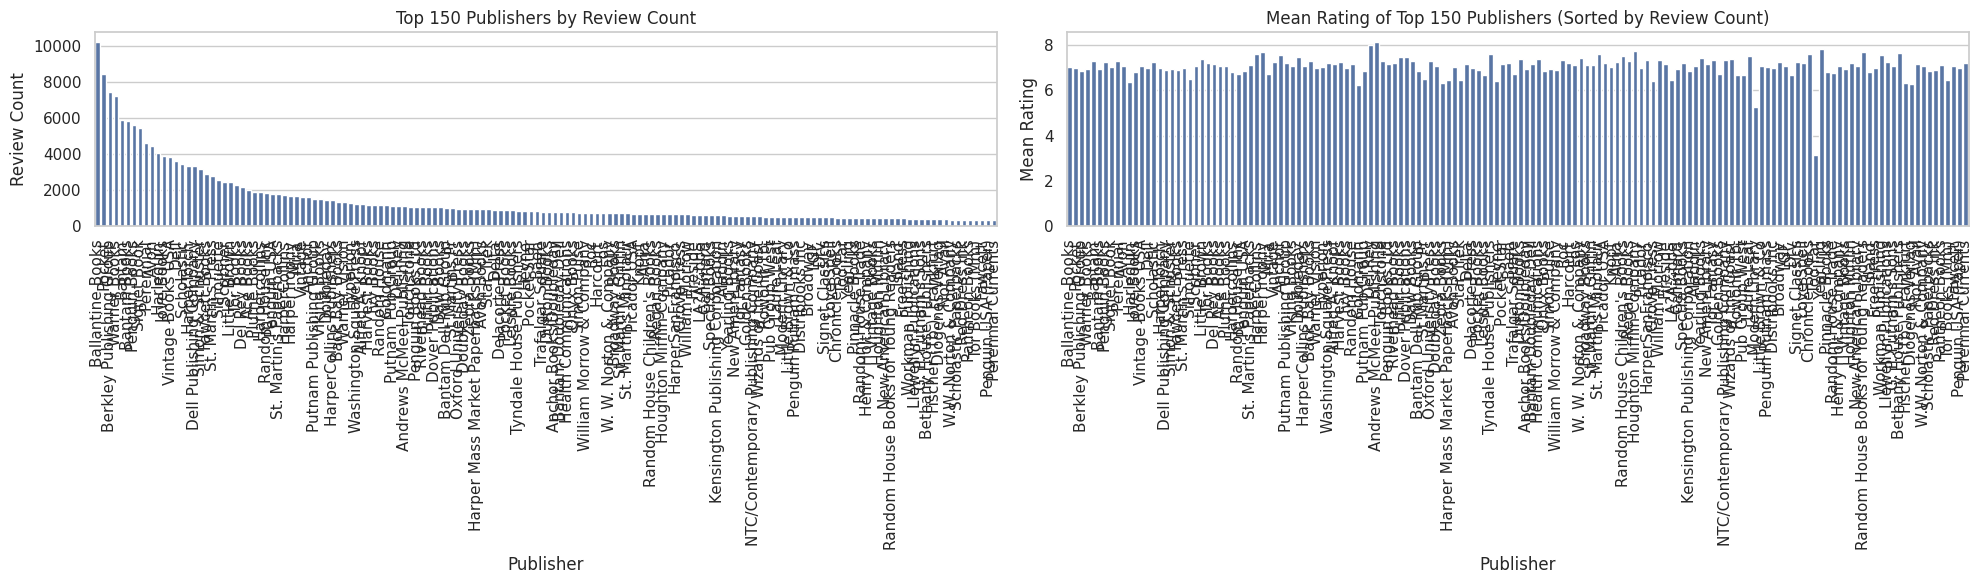

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# -------------------------------------------------------------
# 1) 출판사별 리뷰수 & 평균평점 계산
# -------------------------------------------------------------
publisher_stats = (
    train_rating_df
    .merge(books[["isbn", "publisher"]], on="isbn", how="left")
    .groupby("publisher")["rating"]
    .agg(["count", "mean"])
    .reset_index()
    .rename(columns={"count": "review_count", "mean": "mean_rating"})
)

publisher_stats = publisher_stats.sort_values("review_count", ascending=False)

# -------------------------------------------------------------
# 2) 출판사 리뷰수 분포 시각화 (Histogram + Log scale)
# -------------------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.histplot(publisher_stats["review_count"], bins=50, ax=ax)
ax.set_title("Distribution of Publisher Review Counts")
ax.set_xlabel("Review Count")
ax.set_ylabel("Number of Publishers")
ax.set_yscale("log")

plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# 3) Top N 출판사 선정
# -------------------------------------------------------------
TOP_N = 150
top_publishers = publisher_stats.head(TOP_N)

print(f"📌 Top {TOP_N} Publishers by Review Count")
display(top_publishers.head(10))

# -------------------------------------------------------------
# 4) Top N 출판사 리뷰수 vs 평균평점 비교 (정렬 정확하게!)
# -------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- (1) 리뷰수 Barplot ---
sns.barplot(
    data=top_publishers,   # 이미 review_count 기준으로 정렬됨
    x="publisher",
    y="review_count",
    ax=axes[0]
)
axes[0].set_title(f"Top {TOP_N} Publishers by Review Count")
axes[0].set_xlabel("Publisher")
axes[0].set_ylabel("Review Count")
axes[0].tick_params(axis='x', rotation=90)

# --- (2) 평균 평점 Barplot (!!! review_count 순서를 유지해야 함 !!!)
top_publishers_sorted = top_publishers.sort_values("review_count", ascending=False)

sns.barplot(
    data=top_publishers_sorted,
    x="publisher",
    y="mean_rating",
    ax=axes[1],
)
axes[1].set_title(f"Mean Rating of Top {TOP_N} Publishers (Sorted by Review Count)")
axes[1].set_xlabel("Publisher")
axes[1].set_ylabel("Mean Rating")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



